In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

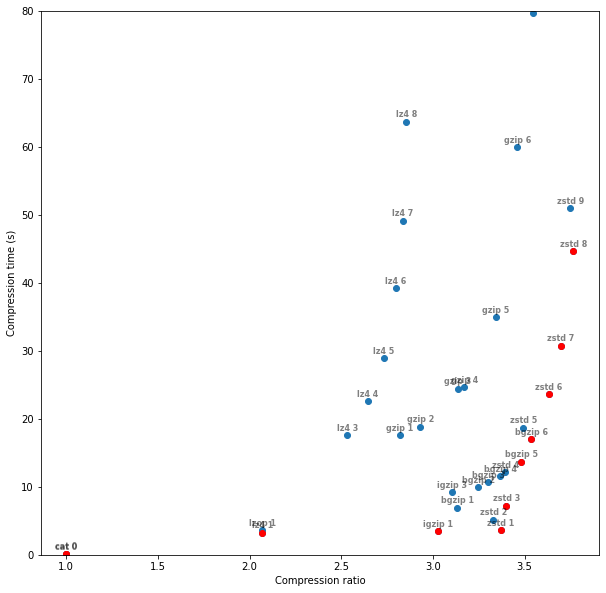

In [94]:
def read_table(path):
    df = pd.read_table(path, sep="\t",  names=["program", "level", "size", "time"])
    original_size = df[df["program"] == "cat"]["size"].loc[0]
    df["ratio"] = original_size / df["size"]

    # exclude igzip and lz4 compression level 2 as these are nearly
    # identical to the respective compression level 1
    df = df.loc[(df["program"] != "igzip") | (df["level"] != 2)]
    df = df.loc[(df["program"] != "lz4") | (df["level"] != 2)]

    # A parameter combination (ratio and time) is Pareto optimal if
    # there is no other combination that is better in *both*
    # criteria.
    is_pareto_optimal = []
    for ratio, time in list(zip(df["ratio"], df["time"])):
        is_pareto_optimal.append(len(df[(df["ratio"] > ratio) & (df["time"] < time)]) == 0)
    df["pareto_optimal"] = is_pareto_optimal
    return df


def plot_table(df, outpath=None, ymax=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    if ymax:
        ax.set_ylim(0, ymax)
    ax.set_xlabel("Compression ratio")
    ax.set_ylabel("Compression time (s)")
    ax.scatter(df["ratio"], df["time"])
    opt = df[df["pareto_optimal"]]
    ax.scatter(opt["ratio"], opt["time"], color="red")
    for ratio, time, lev, prog in list(zip(df["ratio"], df["time"], df["level"], df["program"])):
        text = ax.annotate(
            f"{prog} {lev}",
            xy=(ratio, time + 1), 
            clip_on=True,
            fontsize=8, 
            weight='heavy',
            horizontalalignment='center',
            verticalalignment='center',
        )
        text.set_alpha(0.5)
    if outpath:
        fig.savefig(outpath)

df = read_table("results.SRR020285.darnule.tab")
plot_table(df, ymax=80)

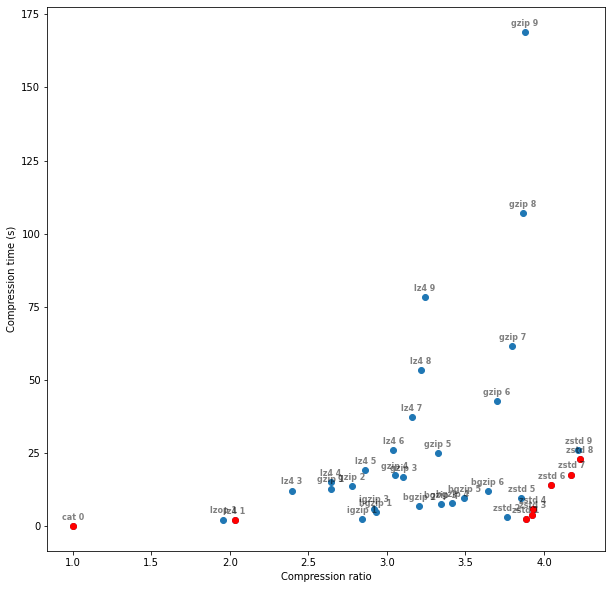

In [92]:
df = read_table("results.ERR1760498_1.darnule.tab")
plot_table(df)